# Final Project 

**Title**: Deep Fake Detection

**Contributors**: Adam Haile, Alhagie Boye, Rudolph Evonich

**Onjective**: To develop a robust CNN model capable of accurately classifying video frames as real or fake.


This is a demo of our CNN model that will be use to classify videos as real or fake.


In [1]:
import os
import json
import glob
import time
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.utils import shuffle
from video_utils import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape

2023-12-03 17:05:04.729165: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 17:05:04.771074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 17:05:04.771101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 17:05:04.772225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 17:05:04.778336: I tensorflow/core/platform/cpu_feature_guar

# Data Loading & Data Preprocessing
The following cells handles the loading of video data and associated metadata and data preprocessing.

Video files and their corresponding metadata are retrieved from a designated directory (train_sample_videos/) and a JSON file (metadata.json).

A custom module named frame_extractor is utilized to extract frame from each video for further processing.

The orientation of the frames is checked, and those with vertical orientation are rotated to ensure consistency.

Based on the metadata information, binary labels are assigned to each frame: 1 for "FAKE" videos and 0 for "REAL" videos.

In [2]:
parent = os.path.dirname(os.getcwd())
videos = glob.glob(parent + "/train_sample_videos/*.mp4")[:100]
f = open(parent + "/train_sample_videos/metadata.json")
valid = json.load(f)

In [3]:
train_X, val_X, train_y, val_y = load_data(videos, valid)
train_X, train_y = shuffle(train_X, train_y, random_state=42)

100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


Creating train/test split


In [4]:
print(train_X.shape)
print(train_y.shape)

(2400, 640, 360, 3)
(2400, 2)


# Model Creation and Training
This cell creates the cnn model to be trained. (Currently a basic CNN example model, not our finished model)

This serves as a basic example and comprises a convolutional layer, max-pooling, flattening, and two dense layers.

The dataset is split into training and validation sets to assess the model's performance during training.

The model is trained on the training set for a specified number of epochs and batch size.

The training and validation accuracy are visualized over epochs using matplotlib to track the model's learning progress.


In [5]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
batch_size = 16
epochs = 10
input_shape = (640, 360, 3)

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 358, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 319, 179, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 177, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 158, 88, 64)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 889856)            0         
                                                                 
 dense (Dense)               (None, 16)                1

2023-12-03 17:05:51.933805: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13811 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:60:00.0, compute capability: 7.5
2023-12-03 17:05:51.935595: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13811 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5
2023-12-03 17:05:51.937151: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 13811 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:da:00.0, compute capability: 7.5
2023-12-03 17:05:51.938820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 13811 MB memory:  -> device: 3, name: Tesla T4, pci bus id: 0000:db:00.0, compute capability: 7.5


In [8]:
history = model.fit(train_X, train_y, steps_per_epoch=len(train_X)//batch_size, epochs=epochs, validation_data=(val_X, val_y))

Epoch 1/10


2023-12-03 17:06:01.784393: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8901
2023-12-03 17:06:03.183448: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f88a7812410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 17:06:03.183483: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-12-03 17:06:03.183488: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-12-03 17:06:03.183493: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-12-03 17:06:03.183497: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5
2023-12-03 17:06:03.188322: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env

150/150 [==============================] - 30s 172ms/step - loss: 0.7355 - accuracy: 0.8033 - val_loss: 0.3753 - val_accuracy: 0.7900
Epoch 2/10
150/150 [==============================] - 14s 96ms/step - loss: 0.2714 - accuracy: 0.8725 - val_loss: 0.2562 - val_accuracy: 0.9217
Epoch 3/10
150/150 [==============================] - 13s 90ms/step - loss: 0.2222 - accuracy: 0.9212 - val_loss: 0.2857 - val_accuracy: 0.9100
Epoch 4/10
150/150 [==============================] - 14s 90ms/step - loss: 0.1856 - accuracy: 0.9438 - val_loss: 0.2301 - val_accuracy: 0.9333
Epoch 5/10
150/150 [==============================] - 14s 90ms/step - loss: 0.1695 - accuracy: 0.9450 - val_loss: 0.1836 - val_accuracy: 0.9400
Epoch 6/10
150/150 [==============================] - 14s 90ms/step - loss: 0.1553 - accuracy: 0.9500 - val_loss: 0.1546 - val_accuracy: 0.9450
Epoch 7/10
150/150 [==============================] - 13s 90ms/step - loss: 0.1392 - accuracy: 0.9538 - val_loss: 0.2017 - val_accuracy: 0.9100
Ep

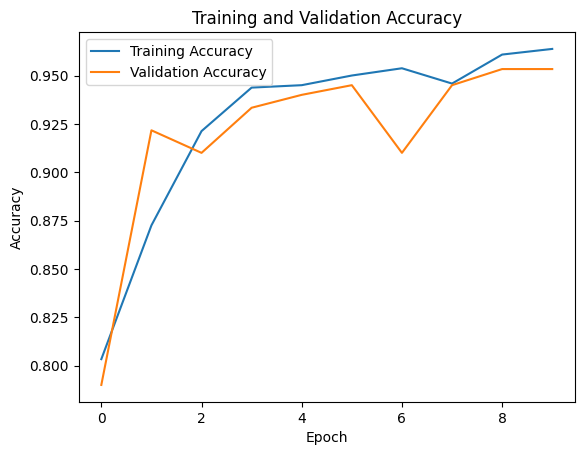

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
evaluation = model.evaluate(val_X, val_y)
print(f"Validation Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 2s 93ms/step - loss: 0.1241 - accuracy: 0.9533
Validation Accuracy: 95.33%
